In [337]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.cosmology import LambdaCDM
from astropy.cosmology import w0waCDM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [338]:
from pyACC.cosmology import Distances
from pyACC.cosmology import HubbleFunction

In [339]:
c = 299792.458  # Speed of light in km/s
z = np.linspace(0, 3, 1000)

In [340]:
#CMB
hfCMB = HubbleFunction( H0=67.14, omega_m=0.3169 , omega_l = 0.6831, omega_rad=0 , omega_k = 0.0)
hfCMB(z)
distances = Distances(hfCMB)
comoving_distCMB = distances.comoving_distance(z)
comoving_distCMB = np.array(comoving_distCMB)
hfCMB = np.array(hfCMB(z))
D_HCMB = c / hfCMB 
D_vCMB = ( z * (comoving_distCMB)**2 / hfCMB )**(1/3)



In [341]:
#CMBDESI
hfCMBDESI = HubbleFunction( H0=68.173, omega_m=0.3027 , omega_l = 0.6973, omega_rad=0 , omega_k = 0.0)
hfCMBDESI(z)
distancesCMBDESI = Distances(hfCMBDESI)
comoving_distCMBDESI = distances.comoving_distance(z)
comoving_distCMBDESI = np.array(comoving_distCMBDESI)
hfCMBDESI = np.array(hfCMBDESI(z))
D_HCMBDESI = c / hfCMBDESI
D_vCMBDESI = ( z * (comoving_distCMBDESI)**2 / hfCMBDESI )**(1/3)

/var/folders/63/3_tf2z012_54tw7489nrm_gc0000gn/T/ipykernel_23054/808988125.py:4: RuntimeWarning: invalid value encountered in divide
  axes[0].plot(z, D_vCMB/D_vCMB, 'k')
/var/folders/63/3_tf2z012_54tw7489nrm_gc0000gn/T/ipykernel_23054/808988125.py:5: RuntimeWarning: invalid value encountered in divide
  axes[0].plot(z, D_vCMBDESI/D_vCMB, 'm')
/var/folders/63/3_tf2z012_54tw7489nrm_gc0000gn/T/ipykernel_23054/808988125.py:11: RuntimeWarning: invalid value encountered in divide
  axes[1].plot(z, comoving_distCMB/comoving_distCMB, 'k')
/var/folders/63/3_tf2z012_54tw7489nrm_gc0000gn/T/ipykernel_23054/808988125.py:12: RuntimeWarning: invalid value encountered in divide
  axes[1].plot(z, comoving_distCMBDESI/comoving_distCMB, 'm')


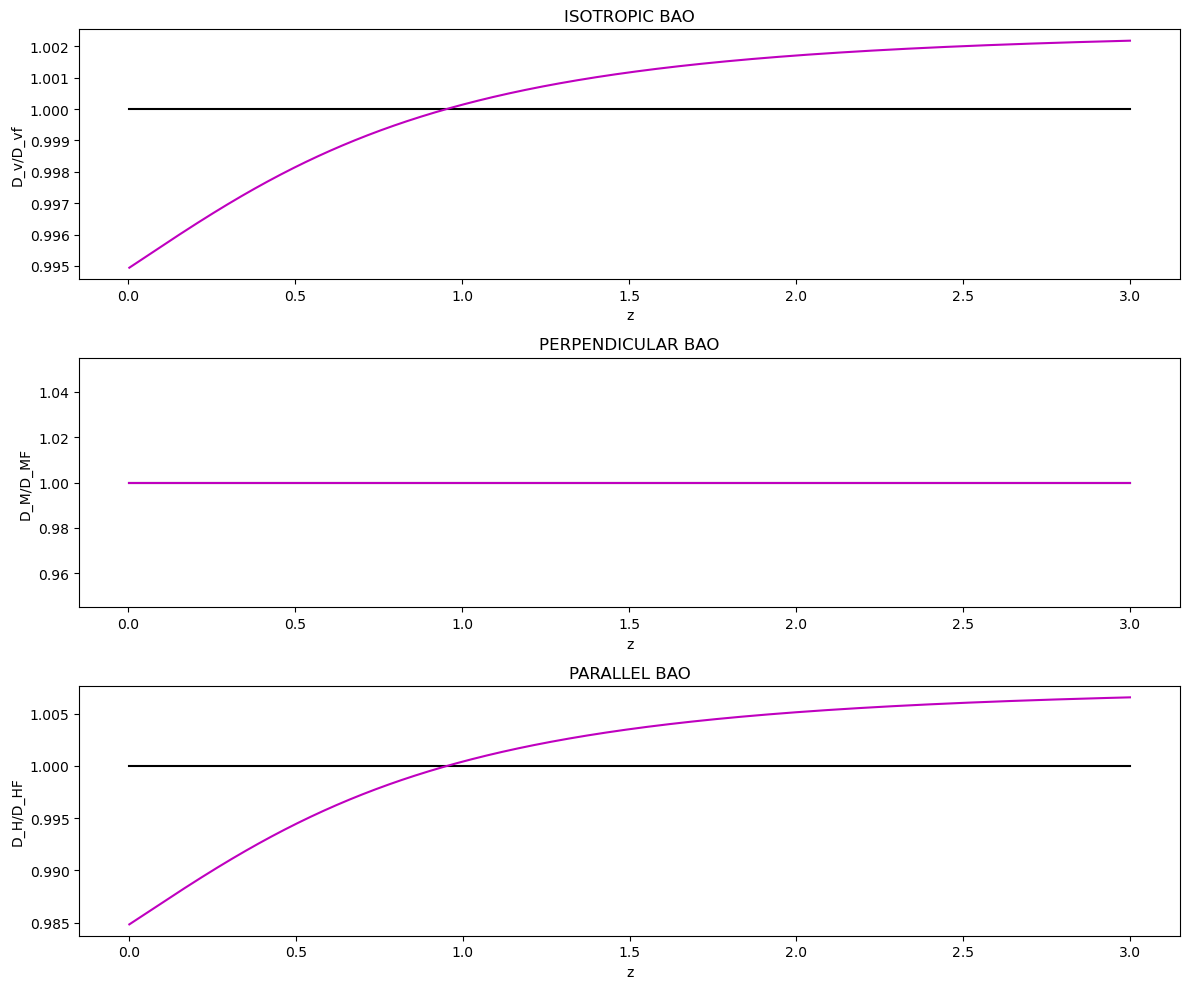

In [342]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))  # 1 righe, 3 colonne

# Primo grafico
axes[0].plot(z, D_vCMB/D_vCMB, 'k')
axes[0].plot(z, D_vCMBDESI/D_vCMB, 'm')
axes[0].set_title("ISOTROPIC BAO")
axes[0].set_xlabel("z")
axes[0].set_ylabel("D_v/D_vf")

# Secondo grafico
axes[1].plot(z, comoving_distCMB/comoving_distCMB, 'k')
axes[1].plot(z, comoving_distCMBDESI/comoving_distCMB, 'm')
axes[1].set_title("PERPENDICULAR BAO")
axes[1].set_xlabel("z")
axes[1].set_ylabel("D_M/D_MF")

# Terzo grafico
axes[2].plot(z, D_HCMB/D_HCMB, 'k')
axes[2].plot(z, D_HCMBDESI/D_HCMB, 'm')
axes[2].set_title("PARALLEL BAO")
axes[2].set_xlabel("z")
axes[2].set_ylabel("D_H/D_HF")
#mostra i grafici
plt.tight_layout()
plt.show()


In [343]:
'CON ASTROPY CMB'
cosmo = LambdaCDM(H0=67.14, Om0=0.3169, Ode0=0.6831)
D_HCMBO = cosmo.H(z)
D_CCMB = cosmo.comoving_distance(z)
D_VCMB = ( z * (D_CCMB)**2 / D_HCMB )**(1/3)

In [344]:
'CON ASTROPY CMBDESI'
cosmo = LambdaCDM(H0=68.173, Om0=0.3027, Ode0=0.6973)
D_HCMBDESIO = cosmo.H(z)
D_CCMBDESI = cosmo.comoving_distance(z)
D_VCMBDESI = ( z * (D_CCMBDESI)**2 / D_HCMBDESI )**(1/3)

/Users/matteocicirello/anaconda3/envs/acc-env/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


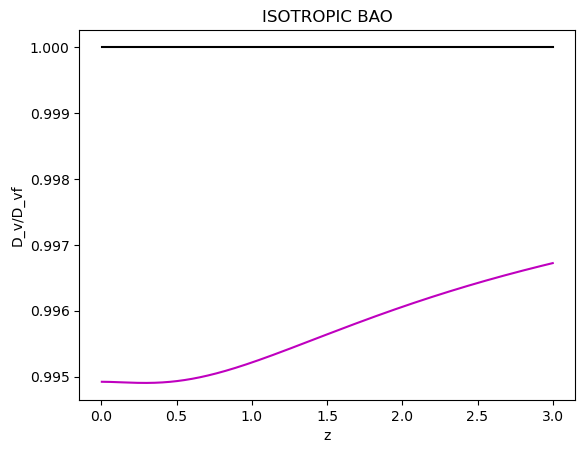

In [346]:
plt.plot(z, D_VCMB/D_VCMB, 'k')
plt.plot(z, D_VCMBDESI/D_VCMB, 'm')
plt.title("ISOTROPIC BAO")
plt.xlabel("z")
plt.ylabel("D_v/D_vf")
plt.show()

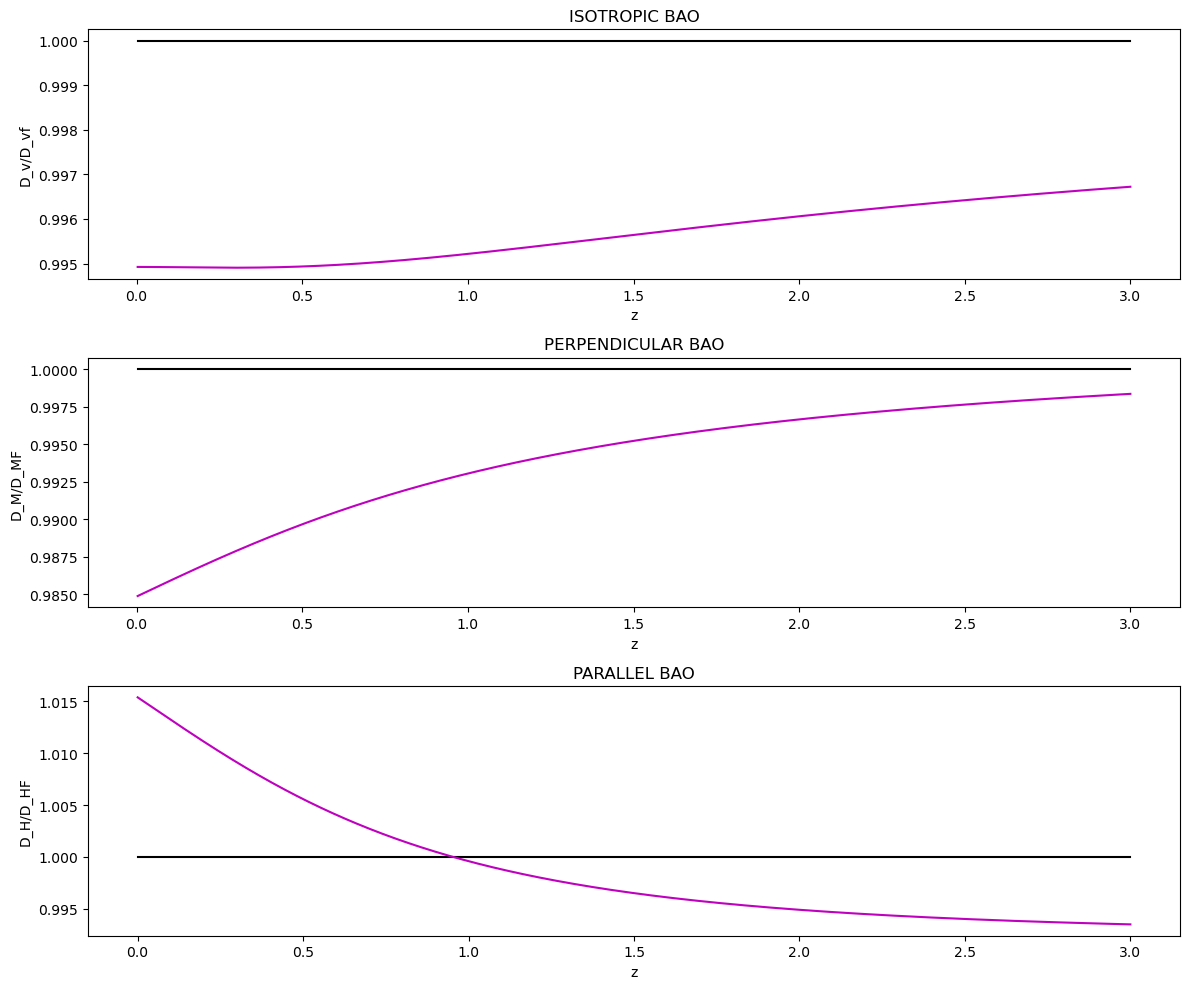

In [347]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))  # 1 righe, 3 colonne

# Primo grafico
axes[0].plot(z, D_VCMB/D_VCMB, 'k')
axes[0].plot(z, D_VCMBDESI/D_VCMB, 'm')
axes[0].set_title("ISOTROPIC BAO")
axes[0].set_xlabel("z")
axes[0].set_ylabel("D_v/D_vf")

# Secondo grafico
axes[1].plot(z, D_CCMB/D_CCMB, 'k')
axes[1].plot(z, D_CCMBDESI/D_CCMB, 'm')
axes[1].set_title("PERPENDICULAR BAO")
axes[1].set_xlabel("z")
axes[1].set_ylabel("D_M/D_MF")

# Terzo grafico
axes[2].plot(z, D_HCMBO/D_HCMBO, 'k')
axes[2].plot(z, D_HCMBDESIO/D_HCMBO, 'm')
axes[2].set_title("PARALLEL BAO")
axes[2].set_xlabel("z")
axes[2].set_ylabel("D_H/D_HF")
#mostra i grafici
plt.tight_layout()
plt.show()